# I.Import Librairies

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!pip install pyproj==1.9.6
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

!pip install pyspellchecker
!pip install emoji
!pip install spacy
!python -m pip install -U pyLDAvis

     |████████████████████████████████| 2.8MB 11.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702117 sha256=52604861e8435aca015ed3cfd24f1c98b4561cffa92bb85bd91732694467b009
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import re
from geopy.geocoders import Nominatim
from datetime import date
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans,vq
from mpl_toolkits.basemap import Basemap
import collections
import os
import string
import sys
import scipy
import spellchecker
import emoji
import spacy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(0)
import nltk
nltk.download('wordnet')
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora, models
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



# II. Definition of useful functions

In [9]:
def get_original_data():
  df1 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_1.csv', engine='python' )
  df2 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_2.csv', engine='python' )
  df3 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_3.csv', engine='python' )
  df4 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_4.csv', engine='python' )
  df5 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_5.csv', engine='python' )
  df6 = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/data_6.csv', engine='python' )
  frames = [df1, df2, df3, df4, df5, df6]
  df = pd.concat(frames)
  return df 

In [10]:
def get_cleaned_data():
  # Get original dataset
  df = get_original_data()

  # Drop null values
  df = df.dropna()

  # Filter on dates that are usable
  df = df.loc[df['Date'].apply(lambda x : len(x)) ==10]
  df['Date'] = pd.to_datetime(df['Date'])

  # Change the type of User Created_At to date
  df['User Created_At'] = pd.to_datetime(df['User Created_At'])
  df['Created_At'] = pd.to_datetime(df['Created_At'])

  # Clean boolean features 

  dico_bool ={ 'False': False, 'True': True, False: False, True: True}
  df["Verified"] = df['Verified'].apply(lambda x : dico_bool[x])
  df['Retweeted.1'] = df['Retweeted.1'].apply(lambda x : dico_bool[x])
  df['Retweeted'] = df['Retweeted'].apply(lambda x : dico_bool[x])

  return df

In [11]:
def get_enriched_data():
  df = get_cleaned_data()

  # Add geographic features
  loc = pd.read_csv('/content/drive/My Drive/Data Mining Project/Final Files/Data/Location_enriched.csv')
  df = df.merge(loc, how = 'left', on = 'Location')

  # Add dates features
  column_dates = ['Date', 'User Created_At', 'Created_At']

  today = date.today()

  for col in column_dates: 
    df['Age of '+ col] = (today - pd.to_datetime(df[col]).apply(lambda x: x.date()) )
    df['Weekday of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.weekday())
    df['Month of '+ col ] = pd.to_datetime(df[col]).apply(lambda x: x.month)                                                  
 
  return df 

In [12]:
def repartition (column):
  df_repartition = df[column].value_counts().reset_index()
  print("The number of unique values of ", column, " is: ", len(df_repartition))
  df_repartition.columns  = [column, "Number of Tweets"]
  df_repartition[column] = df_repartition[column].apply(lambda x: str(x))
  df_repartition["Number of Tweets"] = df_repartition["Number of Tweets"]
  fig = plt.figure(figsize=(20,20))
  sns.barplot(x = 'Number of Tweets',  y = column, data = df_repartition.head(40), palette = "flare");
  plt.title('Occurence of top values of ' +str( column))
  plt.show()
  print(df_repartition.head(20))

In [13]:
def repartition_in_percentage (column):
  df_repartition = df[column].value_counts().reset_index()
  print("The number of unique values of ", column, " is: ", len(df_repartition))
  df_repartition.columns  = [column, "Percentage of Tweets"]
  df_repartition[column] = df_repartition[column].apply(lambda x: str(x))
  fig = plt.figure(figsize=(20,20))
  df_repartition["Percentage of Tweets"] = df_repartition["Percentage of Tweets"]/len(df)*100
  sns.barplot(x = 'Percentage of Tweets',  y = column, data = df_repartition.head(40), palette = "flare");
  plt.title('Percentatge of top values of ' + str(column))
  plt.show()
  print(df_repartition.head(20))

In [14]:
def distributions():
  numeric_columns = df._get_numeric_data().columns
  for f in numeric_columns: 
    plt.figure(figsize=(10,5))
    sns.kdeplot(data = df, x = f, color="pink", bw_adjust=5, fill=True)
    plt.title('Distribution of '+f)
    plt.show()


In [15]:
def box_plots(df):
  numeric_columns = df._get_numeric_data().columns
  for f in numeric_columns: 
    sns.boxplot(x = f , data = df, palette = "flare");
    plt.title("Repartition of "+ f)
    plt.show()
    print("The detailed description is the following")
    print(df[f].describe())
    print()

# III. Text analysis

## A. Clean Text data 

### Definition of functions to clean noisy text 

#### Definition of subfunctions

##### Correct spelling

In [16]:
def correct_spelling(text):
  spellcheck = spellchecker.SpellChecker()
  corrected_text = [spellcheck.correction(word) for word in text.split()]
  return (' '.join(corrected_text))

##### Remove emojis

In [17]:
def demojize(text):
  return emoji.demojize(text)

##### Remove repetition

In [18]:
def remove_repetition_from_text(text):
  def remove_repetition_from_word(word):
    dictionary = set(nltk.corpus.words.words())
    while word not in dictionary :
        word = word[:-1]
    return word 
  cleaned_text = " ".join([remove_repetition_from_word(word) for word in text.split()])
  return cleaned_text 

##### Find elements : links/ mentions/ hashtags

In [19]:
def links (text):
  return re.findall('((www\.[^\s]+)|(https?://[^\s]+))', text, flags=re.MULTILINE)

<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-19-5430f40285cc>:2: DeprecationWarning: invalid escape sequence \.
  return re.findall('((www\.[^\s]+)|(https?://[^\s]+))', text, flags=re.MULTILINE)


In [20]:
def mentions(text):
  return re.findall("\@\w+",text)

<input>:2: DeprecationWarning: invalid escape sequence \@
<input>:2: DeprecationWarning: invalid escape sequence \@
<input>:2: DeprecationWarning: invalid escape sequence \@
<ipython-input-20-70001a14102f>:2: DeprecationWarning: invalid escape sequence \@
  return re.findall("\@\w+",text)


In [21]:
def hashtags(text):
  return re.findall("\#\w+",text)

<input>:2: DeprecationWarning: invalid escape sequence \#
<input>:2: DeprecationWarning: invalid escape sequence \#
<input>:2: DeprecationWarning: invalid escape sequence \#
<ipython-input-21-45a06f2752db>:2: DeprecationWarning: invalid escape sequence \#
  return re.findall("\#\w+",text)


##### Remove elements: links/ mentions/ hashtags

In [22]:
def remove_links(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text, flags=re.MULTILINE)

<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-22-5b6ce5eedebc>:2: DeprecationWarning: invalid escape sequence \.
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text, flags=re.MULTILINE)


In [23]:
def remove_hashtag(text):
  return re.sub("\#\w+",'', text)

<input>:2: DeprecationWarning: invalid escape sequence \#
<input>:2: DeprecationWarning: invalid escape sequence \#
<input>:2: DeprecationWarning: invalid escape sequence \#
<ipython-input-23-651b47f4ba2f>:2: DeprecationWarning: invalid escape sequence \#
  return re.sub("\#\w+",'', text)


In [24]:
def remove_mentions(text):
  return re.sub("\@\w+",'',text)

<input>:2: DeprecationWarning: invalid escape sequence \@
<input>:2: DeprecationWarning: invalid escape sequence \@
<input>:2: DeprecationWarning: invalid escape sequence \@
<ipython-input-24-2620e14d6d2e>:2: DeprecationWarning: invalid escape sequence \@
  return re.sub("\@\w+",'',text)


#####  Adding meta features: number of words


In [25]:
def nb_words(text):
  return len( [word for word in text.split()])

##### Remove stop words

In [26]:
from nltk.corpus import stopwords
def remove_stop_words(text):
  text = re.sub(r'[^\w\s]','', text)
  #nltk_stopwords = set(stopwords.words('english'))
  nltk_stopwords = set(STOPWORDS)
  nltk_stopwords.update(['covid', 'coronavirus', 'covid19','covid-19', 'corona', "&amp;",'amp' '-'])
  text_without_stopword = [word for word in text.split() if word.lower() not in nltk_stopwords]
  return " ".join(text_without_stopword)

##### Steeming

In [27]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def steem(text):
  return porter.stem(text)

##### Tokenization

In [28]:
def tokenize(text):
  return nltk.word_tokenize(text)

In [29]:
import nltk
def tokenize(text):
  return nltk.word_tokenize(text)

#### Definition of main function to transform the dataset and clean the text features

##### For text 

In [30]:
def clean(text):
  text = remove_links(text)
  text = remove_mentions(text)
  text = remove_hashtag(text)
  text = re.sub("[0-9]", "",  text)
  text = text.lower()
  return text 

In [31]:
def advanced_clean(text):
  #text = demojize(text)
  text = clean(text)
  text = remove_links(text)
  text = remove_mentions(text)
  text = remove_hashtag(text)
  text = remove_stop_words(text)
  #text = correct_spelling(text)
  #text = remove_repetition_from_text(text)
  text = steem(text)
  return text

#####  For dataframes

In [32]:
def clean_text(df):
  # Add information that will be removed 
  df["Links"] = df['Text'].apply(lambda x: links(x))
  df['Mentions'] = df['Text'].apply(lambda x: mentions(x))
  df['Hashtags Text'] =df['Text'].apply(lambda x: hashtags(x))
  print("Information added to the dataframe.")

  # Remove links, mentions, and hashtags from text 
  df['Text'] = df['Text'].apply(lambda x: remove_links(x))
  df['Text'] = df['Text'].apply(lambda x: remove_mentions(x))
  df['Text'] = df['Text'].apply(lambda x: remove_hashtag(x))
  print("Information of links, mentions, and hashtags are removed from text.")

  # String to lower
  df['Text'] = df['Text'].apply(lambda x: x.lower())
  print('All words are in lower case.')

  # Adding meta features
  df['Number of words'] = df['Text'].apply(lambda x: nb_words(x))
  print("Meta features added.")
  return df
  

In [33]:
def clean_text(df):
  # Add information that will be removed 
  df["Links"] = df['Text'].apply(lambda x: links(x))
  df['Mentions'] = df['Text'].apply(lambda x: mentions(x))
  df['Hashtags Text'] =df['Text'].apply(lambda x: hashtags(x))
  print("Information added to the dataframe.")

  df['Text']  = df['Text'].apply(lambda x: clean(x))

  """
  # Remove links, mentions, and hashtags from text 
  df['Text'] = df['Text'].apply(lambda x: remove_links(x))
  df['Text'] = df['Text'].apply(lambda x: remove_mentions(x))
  df['Text'] = df['Text'].apply(lambda x: remove_hashtag(x))
  print("Information of links, mentions, and hashtags are removed from text.")

  # String to lower
  df['Text'] = df['Text'].apply(lambda x: x.lower())
  print('All words are in lower case.')
  """
  # Adding meta features
  df['Number of words'] = df['Text'].apply(lambda x: nb_words(x))
  print("Meta features added.")
  return df
  

In [34]:
def advanced_clean_text(df):
  df['Text'] = df['Text'].apply(lambda x: correct_spelling(x))

  #print("Spelling corrected")
  print('Spelling of text is corrected.')
  
  # Remove emojis
  df['Text'] = df['Text'].apply(lambda x: demojize(x))
  print("Emojize removed from text.")
  return df

### Apply transformations to general dataframe

In [35]:
df = get_enriched_data()
df = clean_text(df)

Information added to the dataframe.
Meta features added.


### Export all tweets into a text file

In [36]:
all_tweets = " ".join(tweet for tweet in df ['Text'])

In [37]:
#with open('/content/drive/My Drive/Data Mining Project/Final Files/Data/all_tweets.txt', 'w') as writefile:
#    writefile.write(all_tweets)

## B. Analysis of most common words 

### Occurrence of words

#### Definition of functions for word count

In [38]:
def wordcount(text):
    dictionnaire = {}
    words = text.split(" ")
    for w in words: 
        if (w != "" ):
            w = w.lower()
            dictionnaire[w] = (dictionnaire.get(w,0)+1)
    return dictionnaire

In [39]:
def sorted_wordcount_occurrences(text):
    dictionnaire = wordcount(text)
    return (dict(sorted(dictionnaire.items(), key = lambda x: x[1],reverse= True)))

#### Occurence of words without removing stopwords

In [40]:
word_counter = sorted_wordcount_occurrences(all_tweets)
occurrence_words = pd.DataFrame()
occurrence_words['Word'] = word_counter.keys()
occurrence_words['Occurrence'] = word_counter.values()
occurrence_words.head()
print("The most common words are")
occurrence_words.head(20)

The most common words are


,Word,Occurrence
0,the,1002630
1,to,694596
2,of,493387
3,a,456340
4,in,427948
5,and,406425
6,covid,394613
7,is,322372
8,for,307456
9,i,229758


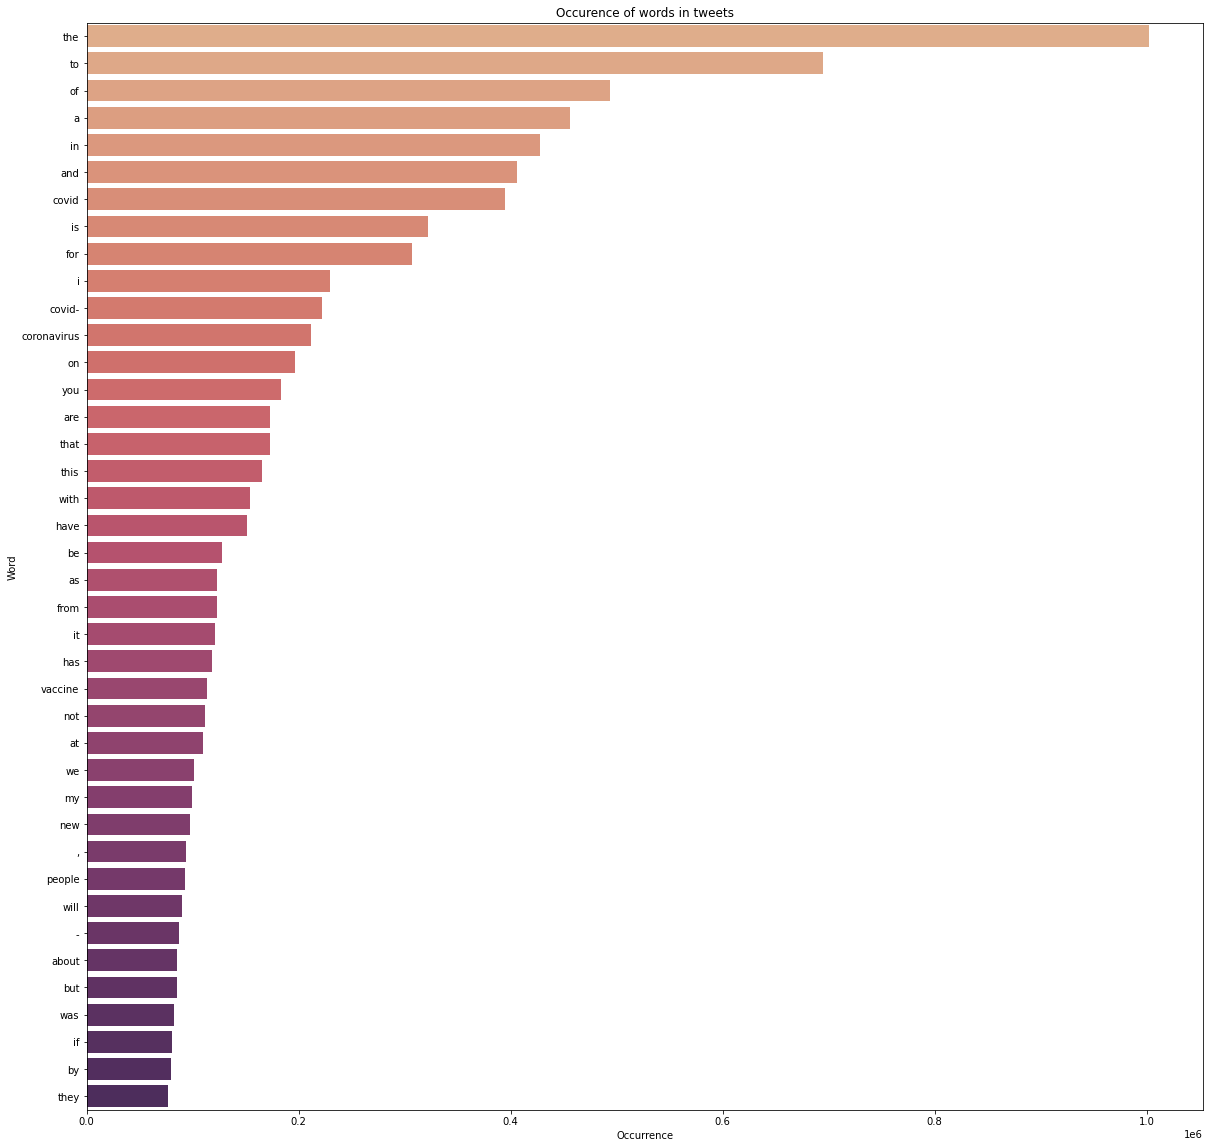

In [41]:
  fig = plt.figure(figsize=(20,20))
  sns.barplot(x = 'Occurrence',  y = 'Word', data = occurrence_words.head(40), palette = "flare");
  plt.title('Occurence of words in tweets')
  plt.show()

#### Occurence of words without stopwords

In [42]:
word_counter = sorted_wordcount_occurrences(remove_stop_words(all_tweets))
occurrence_words = pd.DataFrame()
occurrence_words['Word'] = word_counter.keys()
occurrence_words['Occurrence'] = word_counter.values()
occurrence_words.head()
print("The most common words are")
occurrence_words.head(20)

The most common words are


,Word,Occurrence
0,vaccine,145861
1,new,105028
2,people,103462
3,cases,95518
4,pandemic,56609
5,amp,55113
6,trump,52862
7,like,51062
8,dont,50214
9,deaths,49605


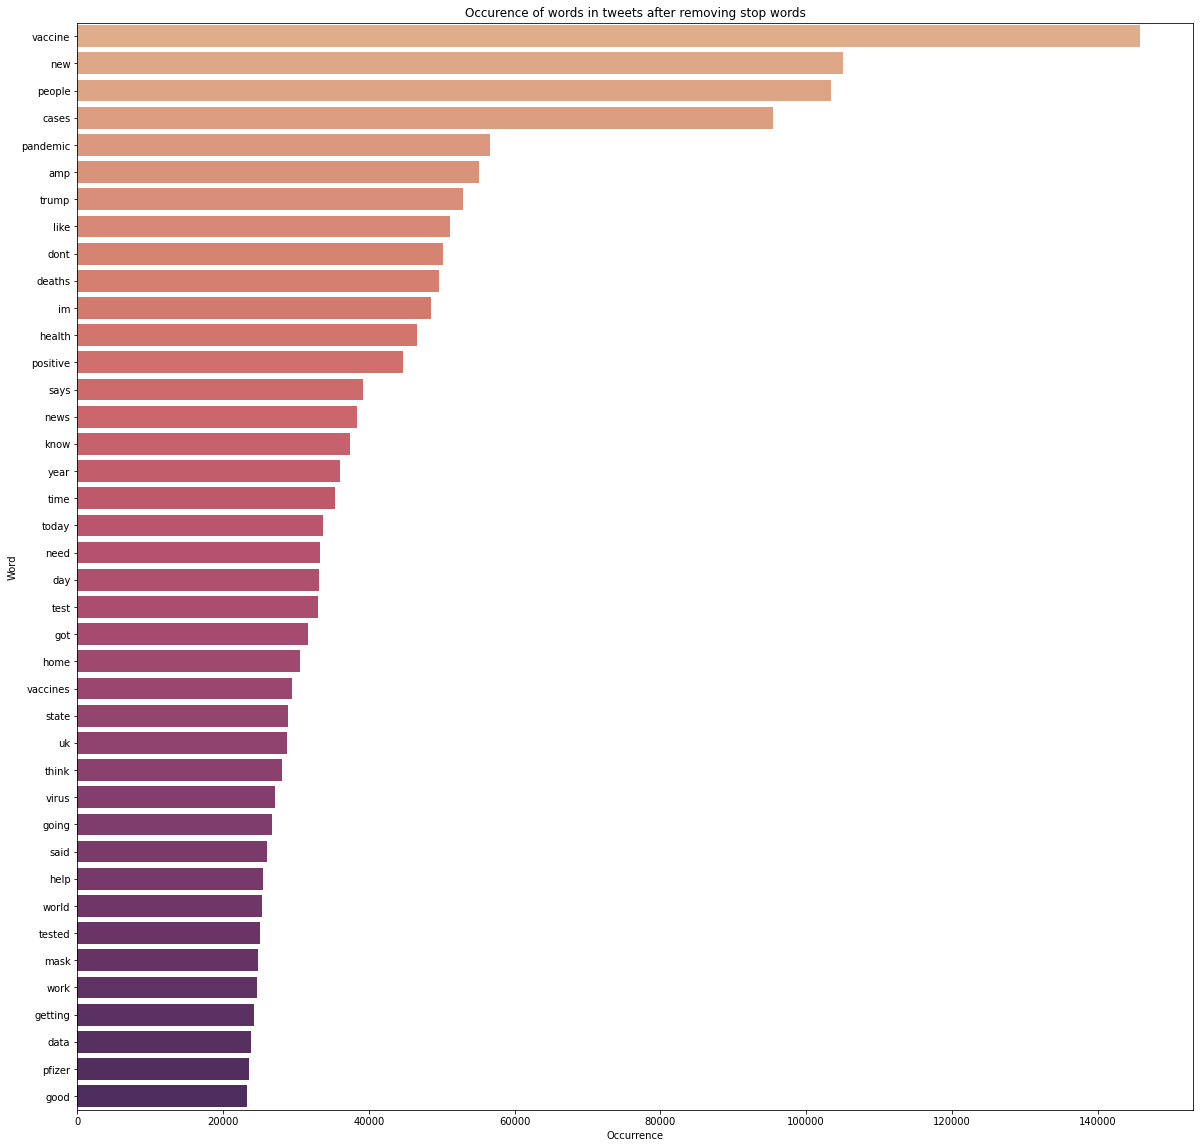

In [43]:
fig = plt.figure(figsize=(20,20))
sns.barplot(x = 'Occurrence',  y = 'Word', data = occurrence_words.head(40), palette = "flare");
plt.title('Occurence of words in tweets after removing stop words')
plt.show()

### Word Clouds

#### Word clouds of covid tweets without stop words

In [44]:
word_cloud = WordCloud(max_words = 100, background_color='white', normalize_plurals = True).generate(all_tweets)

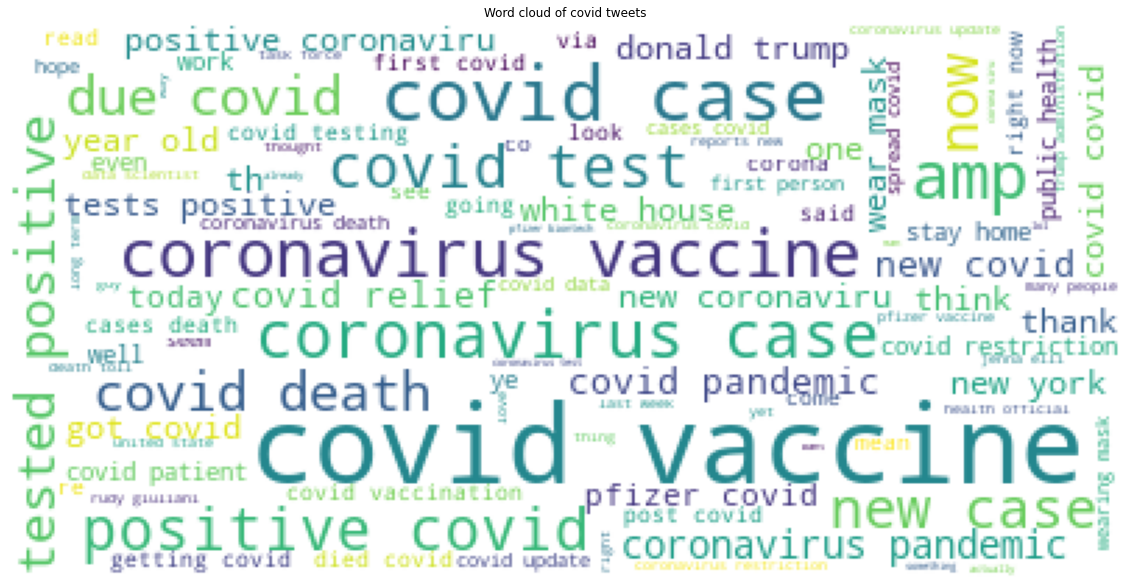

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Word cloud of covid tweets')
plt.show()

#### Word clouds of covid tweets without stop words and without words related to covid

In [46]:
stopwords  = set(STOPWORDS)
stopwords.update(['covid', 'coronavirus', 'covid19', 'covid-19',  'corona', 'amp'])
word_cloud = WordCloud(max_words = 100, stopwords=stopwords, background_color='white', normalize_plurals = True).generate(all_tweets)

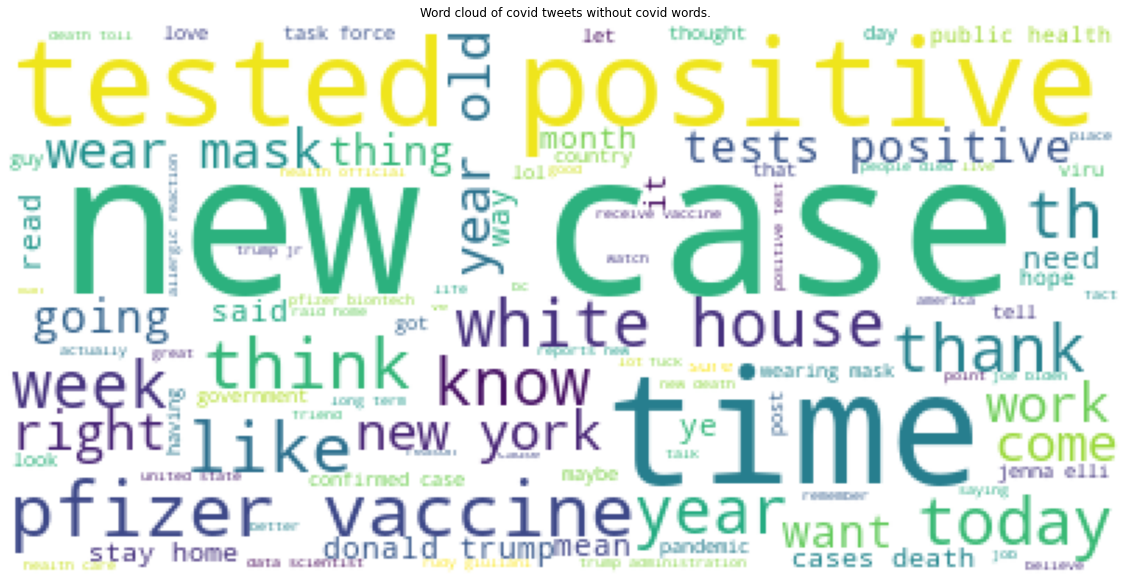

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Word cloud of covid tweets without covid words.')
plt.show()

### Analysis of number of words per tweet

#### Value count

In [48]:
df['Number of words'].value_counts()

18    157259
17    148805
19    148036
16    127400
20    123348
15    110954
14     99136
21     92417
13     91550
12     85081
11     82230
10     75897
9      65734
22     61596
8      54821
7      43344
23     37790
6      33412
5      25680
4      21916
24     20514
3      16327
1      12124
2      10853
25     10098
26      4602
27      2048
28      1148
29       459
30       165
31        70
0         60
32        35
33         3
34         2
37         1
35         1
42         1
Name: Number of words, dtype: int64

#### Density plot of number of words per tweet

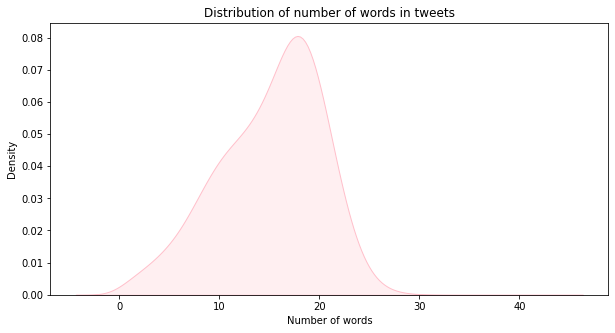

In [49]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x ='Number of words', color="pink", bw_adjust=5, fill=True)
plt.title('Distribution of number of words in tweets')
plt.show()

#### Box plot of number of words per tweet

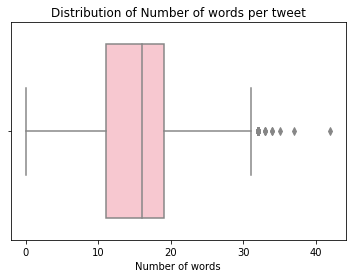

In [50]:
sns.boxplot(data = df, x = 'Number of words', color ='pink')
plt.title('Distribution of Number of words per tweet')
plt.show()

## C. N-grams

### Application of advanced cleaning on tweets 

In [51]:
partial = all_tweets[0: 1000000]
partial = advanced_clean(partial)

In [52]:
tokenized_text = tokenize(partial)

### Bigram 

In [53]:
Bigrams = ngrams(tokenized_text, 2)
BigramFreq = collections.Counter(Bigrams)

In [54]:
BigramFreq.most_common(30)

[(('new', 'cases'), 323),
 (('death', 'toll'), 131),
 (('tested', 'positive'), 98),
 (('public', 'health'), 87),
 (('cases', 'deaths'), 77),
 (('highest', 'daily'), 76),
 (('new', 'deaths'), 71),
 (('new', 'york'), 71),
 (('reports', 'new'), 67),
 (('tests', 'positive'), 67),
 (('coronavirusrelated', 'deaths'), 66),
 (('stay', 'home'), 62),
 (('honestie', 'hodges'), 60),
 (('health', 'officials'), 59),
 (('unemployment', 'claims'), 55),
 (('uk', 'records'), 54),
 (('cases', 'new'), 52),
 (('denver', 'mayor'), 52),
 (('holiday', 'season'), 52),
 (('americans', 'going'), 51),
 (('strict', 'spain'), 50),
 (('watch', 'live'), 49),
 (('deaths', 'highest'), 49),
 (('daily', 'total'), 48),
 (('avoid', 'travel'), 47),
 (('active', 'cases'), 47),
 (('deaths', 'new'), 45),
 (('task', 'force'), 45),
 (('confirmed', 'cases'), 44),
 (('going', 'hungry'), 44)]

### Trigram 

In [55]:
Trigrams = ngrams(tokenized_text, 3)
TrigramsFreq = collections.Counter(Trigrams)

In [56]:
TrigramsFreq.most_common(30)

[(('reports', 'new', 'cases'), 58),
 (('highest', 'daily', 'total'), 47),
 (('deaths', 'highest', 'daily'), 44),
 (('highest', 'death', 'toll'), 44),
 (('coronavirusrelated', 'deaths', 'highest'), 43),
 (('uk', 'records', 'coronavirusrelated'), 42),
 (('records', 'coronavirusrelated', 'deaths'), 42),
 (('daily', 'total', 'start'), 42),
 (('americans', 'going', 'hungry'), 41),
 (('thanksgiving', 'night', 'game'), 40),
 (('recovered', 'persons', 'recovered'), 40),
 (('persons', 'recovered', 'persons'), 40),
 (('strict', 'spain', 'masks'), 39),
 (('need', 'people', 'recovery'), 39),
 (('people', 'work', 'september'), 39),
 (('work', 'september', 'far'), 39),
 (('september', 'far', 'massive'), 39),
 (('far', 'massive', 'unemployment'), 39),
 (('massive', 'unemployment', 'peak'), 39),
 (('unemployment', 'peak', 'o'), 39),
 (('deaths', 'new', 'cases'), 37),
 (('honestie', 'hodges', 'handcuffed'), 36),
 (('cancels', 'cheering', 'crowds'), 36),
 (('cheering', 'crowds', 'wild'), 36),
 (('crowds

### 4- Gram

In [57]:
Quadrigrams = ngrams(tokenized_text, 4)
QuadrigramsFreq = collections.Counter(Quadrigrams)

In [58]:
QuadrigramsFreq.most_common(30)

[(('deaths', 'highest', 'daily', 'total'), 44),
 (('records', 'coronavirusrelated', 'deaths', 'highest'), 42),
 (('coronavirusrelated', 'deaths', 'highest', 'daily'), 42),
 (('highest', 'daily', 'total', 'start'), 42),
 (('uk', 'records', 'coronavirusrelated', 'deaths'), 41),
 (('recovered', 'persons', 'recovered', 'persons'), 40),
 (('people', 'work', 'september', 'far'), 39),
 (('work', 'september', 'far', 'massive'), 39),
 (('september', 'far', 'massive', 'unemployment'), 39),
 (('far', 'massive', 'unemployment', 'peak'), 39),
 (('massive', 'unemployment', 'peak', 'o'), 39),
 (('persons', 'recovered', 'persons', 'recovered'), 39),
 (('cancels', 'cheering', 'crowds', 'wild'), 36),
 (('cheering', 'crowds', 'wild', 'celebrations'), 36),
 (('crowds', 'wild', 'celebrations', 'coaches'), 36),
 (('wild', 'celebrations', 'coaches', 'players'), 36),
 (('celebrations', 'coaches', 'players', 'look'), 36),
 (('coaches', 'players', 'look', 'hopeful'), 36),
 (('thanksgiving', 'night', 'game', 'ra

### 5- Gram

In [59]:
Fivegrams = ngrams(tokenized_text, 5)
FivegramsFreq = collections.Counter(Fivegrams)

In [60]:
FivegramsFreq.most_common(30)

[(('coronavirusrelated', 'deaths', 'highest', 'daily', 'total'), 42),
 (('deaths', 'highest', 'daily', 'total', 'start'), 42),
 (('uk', 'records', 'coronavirusrelated', 'deaths', 'highest'), 41),
 (('records', 'coronavirusrelated', 'deaths', 'highest', 'daily'), 41),
 (('people', 'work', 'september', 'far', 'massive'), 39),
 (('work', 'september', 'far', 'massive', 'unemployment'), 39),
 (('september', 'far', 'massive', 'unemployment', 'peak'), 39),
 (('far', 'massive', 'unemployment', 'peak', 'o'), 39),
 (('recovered', 'persons', 'recovered', 'persons', 'recovered'), 39),
 (('persons', 'recovered', 'persons', 'recovered', 'persons'), 39),
 (('cancels', 'cheering', 'crowds', 'wild', 'celebrations'), 36),
 (('cheering', 'crowds', 'wild', 'celebrations', 'coaches'), 36),
 (('crowds', 'wild', 'celebrations', 'coaches', 'players'), 36),
 (('wild', 'celebrations', 'coaches', 'players', 'look'), 36),
 (('celebrations', 'coaches', 'players', 'look', 'hopeful'), 36),
 (('thanksgiving', 'night'

## D. Topic Extraction

### Definition of the corpus

In [61]:
text = df[['Id','Text']].head(10000)

In [62]:
text['Text'] = text['Text'].apply(lambda x: advanced_clean(x)) 
text

,Id,Text
0,1331691372068409344,overstock trading highs giving excellent tradi...
1,1331691367005827076,research staff amazing weve opened vaccine studi
2,1331691365046992897,mind stumbled right came negative great
3,1331691364409597953,minutes flight hancocks account tweeted avoid ...
4,1331691363667152901,usa cdcs likely shorten recommendation long pe...
...,...,...
9995,1331641193357139970,dreadful thing fall hands living god judging h...
9996,1331641189070671873,todays data dashboard showing latest figures s...
9997,1331641184771403777,want days thing looked morning subreddit
9998,1331641179109281792,georgia sen david perdue saw pandemic opportun...


In [63]:
corpus = list(text['Text'])

### Vectorization with TfIdf

In [64]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus)

In [65]:
fetaure_names = tfidf_vectorizer.get_feature_names()

### Application of Kmeans ++ clustering

#### Determination of optimal parameter

In [ ]:
distortions = []
list_k = [i for i in range(2,6)]
for k in list_k :
  model = KMeans(n_clusters = k, init='k-means++' )
  model.fit(tfidf)
  distortions.append(model.inertia_)

In [67]:
elbow_data = pd.DataFrame({'Number of clusters':list_k ,'Distortions':distortions})
sns.lineplot(x='Number of clusters', y='Distortions', data = elbow_data, color = 'pink')
plt.title('Distortions in function of number of clusters for the clustering applied to normalized clustering features ')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

#### Application of Kmeans with optimal parameters

In [68]:
k = 4

In [69]:
model = KMeans(n_clusters = k, init='k-means++' )
model.fit(tfidf)
text["text cluster"] = model.predict(tfidf)
cluster_centers_tfidf = model.cluster_centers_

#### Add topic labels to dataframe 

In [70]:
clusters = model.labels_.tolist()

In [71]:
text['Topic cluster'] = clusters

### Kmeans Cluster Analysis

#### Cluster distribution

In [72]:
text['Topic cluster'].value_counts()

0    9075
2     641
3     167
1     117
Name: Topic cluster, dtype: int64

#### Identify top words per cluster 

In [73]:
cluster_centers_tfidf.argsort()[:, ::-1][0]

array([ 8078, 11112,  7913, ...,   596,  5682,  6745])

In [74]:
for nb_cluster in range(k):
  describing_words = cluster_centers_tfidf.argsort()[:, ::-1][nb_cluster]
  print("\nFor cluster", nb_cluster, "the most describing words are: ")
  for i in range (10):
    print(fetaure_names[describing_words[i]])


For cluster 0 the most describing words are: 
people
thanksgiving
pandemic
new
health
americans
vaccine
need
year
week

For cluster 1 the most describing words are: 
recovered
person
honestie
hodges
police
handcuffed
dead
flies
warnings
hancock

For cluster 2 the most describing words are: 
cases
new
deaths
reports
reported
wednesday
confirmed
death
total
today

For cluster 3 the most describing words are: 
highest
toll
death
daily
records
uk
deaths
hits
coronavirusrelated
total


#### Visualization with TSNE

In [75]:
tSVD = TruncatedSVD(n_components= 3, random_state=0).fit_transform(tfidf)

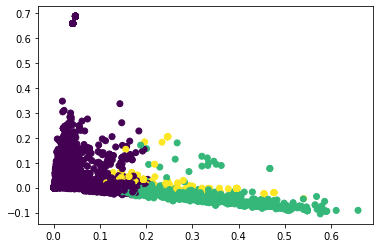

In [76]:
plt.scatter(tSVD[:, 0], tSVD[:, 1], c = clusters)
plt.show()

### Application of Hierarchichal clustering


#### Dendogram

In [77]:
dist = 1 - cosine_similarity(tfidf)

In [78]:
linkage_matrix = ward(dist)

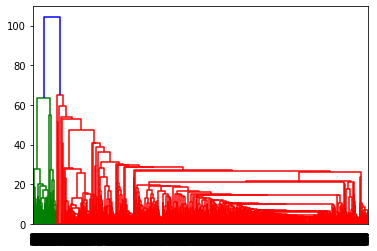

In [79]:
dendrogram(linkage_matrix)
plt.show()

#### Agglomerative Clustering

In [80]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(linkage_matrix)

array([1, 1, 1, ..., 0, 0, 0])

#### Visualization with TSNE

In [81]:
tSVD = TruncatedSVD(n_components= 3, random_state=0).fit_transform(linkage_matrix)

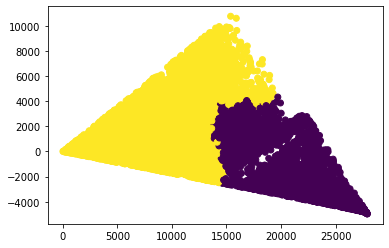

In [82]:
plt.scatter(tSVD[:, 0], tSVD[:, 1], c = cluster.labels_)
plt.show()

In [83]:
cluster.labels_

array([1, 1, 1, ..., 0, 0, 0])

### Application of LDA

#### Build dictionnary

In [84]:
tokenized_text = text['Text'].apply(lambda x: tokenize(x))
tokenized_text 

0       [overstock, trading, highs, giving, excellent,...
1       [research, staff, amazing, weve, opened, vacci...
2          [mind, stumbled, right, came, negative, great]
3       [minutes, flight, hancocks, account, tweeted, ...
4       [usa, cdcs, likely, shorten, recommendation, l...
                              ...                        
9995    [dreadful, thing, fall, hands, living, god, ju...
9996    [todays, data, dashboard, showing, latest, fig...
9997      [want, days, thing, looked, morning, subreddit]
9998    [georgia, sen, david, perdue, saw, pandemic, o...
9999       [domestic, abuse, offences, increased, pandem]
Name: Text, Length: 10000, dtype: object

In [85]:
dictionary = gensim.corpora.Dictionary(tokenized_text )

In [86]:
dictionary.filter_extremes(keep_n= 50000)

#### Vectorization using bag of words corpus, and tfidf corpus

In [87]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

In [88]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#### Apliction of LDA 

##### Apliction of LDA on Bag of words 

In [89]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [90]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.038*"new" + 0.026*"cases" + 0.009*"deaths" + 0.008*"positive" + 0.007*"death" + 0.007*"today" + 0.006*"need" + 0.006*"people" + 0.006*"tests" + 0.006*"reports"
Topic: 1 
Words: 0.018*"new" + 0.016*"deaths" + 0.012*"pandemic" + 0.009*"cases" + 0.008*"health" + 0.007*"day" + 0.007*"reported" + 0.006*"stay" + 0.006*"amp" + 0.005*"trump"
Topic: 2 
Words: 0.012*"thanksgiving" + 0.011*"americans" + 0.010*"people" + 0.007*"time" + 0.006*"year" + 0.006*"health" + 0.005*"test" + 0.005*"going" + 0.005*"county" + 0.005*"travel"
Topic: 3 
Words: 0.015*"cases" + 0.010*"vaccine" + 0.010*"new" + 0.010*"people" + 0.010*"health" + 0.009*"pandemic" + 0.008*"uk" + 0.007*"death" + 0.006*"daily" + 0.006*"week"


In [91]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus_tfidf, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

##### Appplication of LDA on TfIdf 

In [92]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topic: 0 Word: 0.008*"new" + 0.007*"cases" + 0.004*"death" + 0.004*"thanksgiving" + 0.004*"restrictions" + 0.003*"people" + 0.003*"risk" + 0.003*"number" + 0.003*"health" + 0.003*"today"
Topic: 1 Word: 0.007*"people" + 0.007*"cases" + 0.006*"deaths" + 0.005*"million" + 0.005*"test" + 0.004*"new" + 0.004*"spread" + 0.004*"need" + 0.004*"health" + 0.004*"vaccine"
Topic: 2 Word: 0.012*"new" + 0.007*"cases" + 0.006*"deaths" + 0.005*"week" + 0.005*"thanksgiving" + 0.005*"latest" + 0.004*"day" + 0.004*"claims" + 0.004*"pandem" + 0.004*"pandemic"
Topic: 3 Word: 0.008*"pandemic" + 0.005*"dont" + 0.005*"new" + 0.005*"amp" + 0.005*"read" + 0.004*"health" + 0.004*"death" + 0.004*"trump" + 0.004*"work" + 0.004*"people"


In [93]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_tfidf, corpus=corpus_tfidf, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## E. Sentiment analysis of tweets

#### Import Sentiment analyser

In [94]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Apply sentiment analyser on dataset

In [95]:
sid = SentimentIntensityAnalyzer()
df ['Scores'] = df ['Text'].apply(lambda x: sid.polarity_scores(x))
df['Compound']  = df ['Scores'].apply(lambda x: x['compound'])
df['Negative']  = df ['Scores'].apply(lambda x: x['neg'])
df['Positive'] =  df ['Scores'].apply(lambda x: x['pos'])
df['Neutral'] =  df ['Scores'].apply(lambda x: x['neu'])
df['Sentiment Label']  = df ['Compound'].apply(lambda c: 'Positive' if c >=0 else 'Negative')
df.head()

,Unnamed: 0_x,Date,Topic,Id,Screen_Name,Name,Location,User Created_At,Followers_Count,Friends_Count,Favourites_Count,Verified,Created_At,Text,Favorite_Count,Source,Retweeted,Reply_Count,Retweet_Count,Retweeted.1,Hashtags,Unnamed: 0_y,Latitude,Longitude,Country,Age of Date,Weekday of Date,Month of Date,Age of User Created_At,Weekday of User Created_At,Month of User Created_At,Age of Created_At,Weekday of Created_At,Month of Created_At,Links,Mentions,Hashtags Text,Number of words,Scores,Compound,Negative,Positive,Neutral,Sentiment Label
0,0,2020-11-25,Coronavirus,1331691372068409344,MoneyShow,MoneyShow,"Sarasota, FL",2008-10-28 19:34:16,18124.0,10645.0,3870.0,False,2020-11-25 20:08:59,overstock is trading well off its coronavirus ...,0.0,HubSpot,False,0.0,0.0,False,[None],595.0,27.336435,-82.530653,"27.3364347,-82.5306527",40 days,2,11,4451 days,1,10,40 days,2,11,"[(https://t.co/MgH5RTcJzg, , https://t.co/MgH5...",[],[],13,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8020,0.000,0.451,0.549,Positive
1,1,2020-11-25,Coronavirus,1331691367005827076,MrsGailMelvin,Gail Melvin,"East Midlands, England",2016-09-20 14:19:15,439.0,720.0,1921.0,False,2020-11-25 20:08:58,the research staff in are amazing. we've op...,0.0,Twitter for Android,False,0.0,0.0,False,[None],561.0,52.796561,-0.671795,"52.7965611,-0.6717947564067988",40 days,2,11,1567 days,1,9,40 days,2,11,"[(https://t.co/yilrLPHKub, , https://t.co/yilr...","[@PRCLeicester, @Leic_hospital, @LeicResearch]",[],13,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",0.5859,0.000,0.275,0.725,Positive
2,2,2020-11-25,Coronavirus,1331691365046992897,SoCalledEric,MyTracksAreBogus🦷,"Pomona, CA",2015-04-19 02:02:55,129.0,494.0,8926.0,False,2020-11-25 20:08:57,"keep in mind, you may have stumbled with coron...",0.0,Twitter for iPhone,False,0.0,0.0,False,[None],1400.0,34.055381,-117.751750,"34.0553813,-117.7517496",40 days,2,11,2087 days,6,4,40 days,2,11,[],[],[],21,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",-0.5719,0.156,0.000,0.844,Negative
3,3,2020-11-25,Coronavirus,1331691364409597953,Austin_Zone,Austin Frisch,"Nashville, TN",2017-06-30 18:07:40,2242.0,166.0,4411.0,False,2020-11-25 20:08:57,"""about minutes before the flight, hancock's a...",0.0,Twitter Web App,False,0.0,0.0,False,[None],65.0,36.162230,-86.774353,"36.1622296,-86.7743531",40 days,2,11,1284 days,4,6,40 days,2,11,"[(https://t.co/PvdAHvTFnW, , https://t.co/PvdA...",[],[],20,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Positive
4,4,2020-11-25,Coronavirus,1331691363667152901,JuanGrvas,Juan Gérvas,"España, Spain",2012-09-19 18:59:21,18208.0,120.0,7.0,False,2020-11-25 20:08:57,usa. cdcs are likely to shorten their recommen...,0.0,Twitter Web App,False,0.0,0.0,False,[None],NaN,NaN,NaN,NaN,40 days,2,11,3029 days,2,9,40 days,2,11,"[(https://t.co/FDaxNcInK9, , https://t.co/FDax...",[],[],20,"{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound...",-0.2732,0.100,0.000,0.900,Negative


### Study of the repartition of sentiments 


#### Repartition of Sentiment Label 

The number of unique values of  Sentiment Label  is:  2


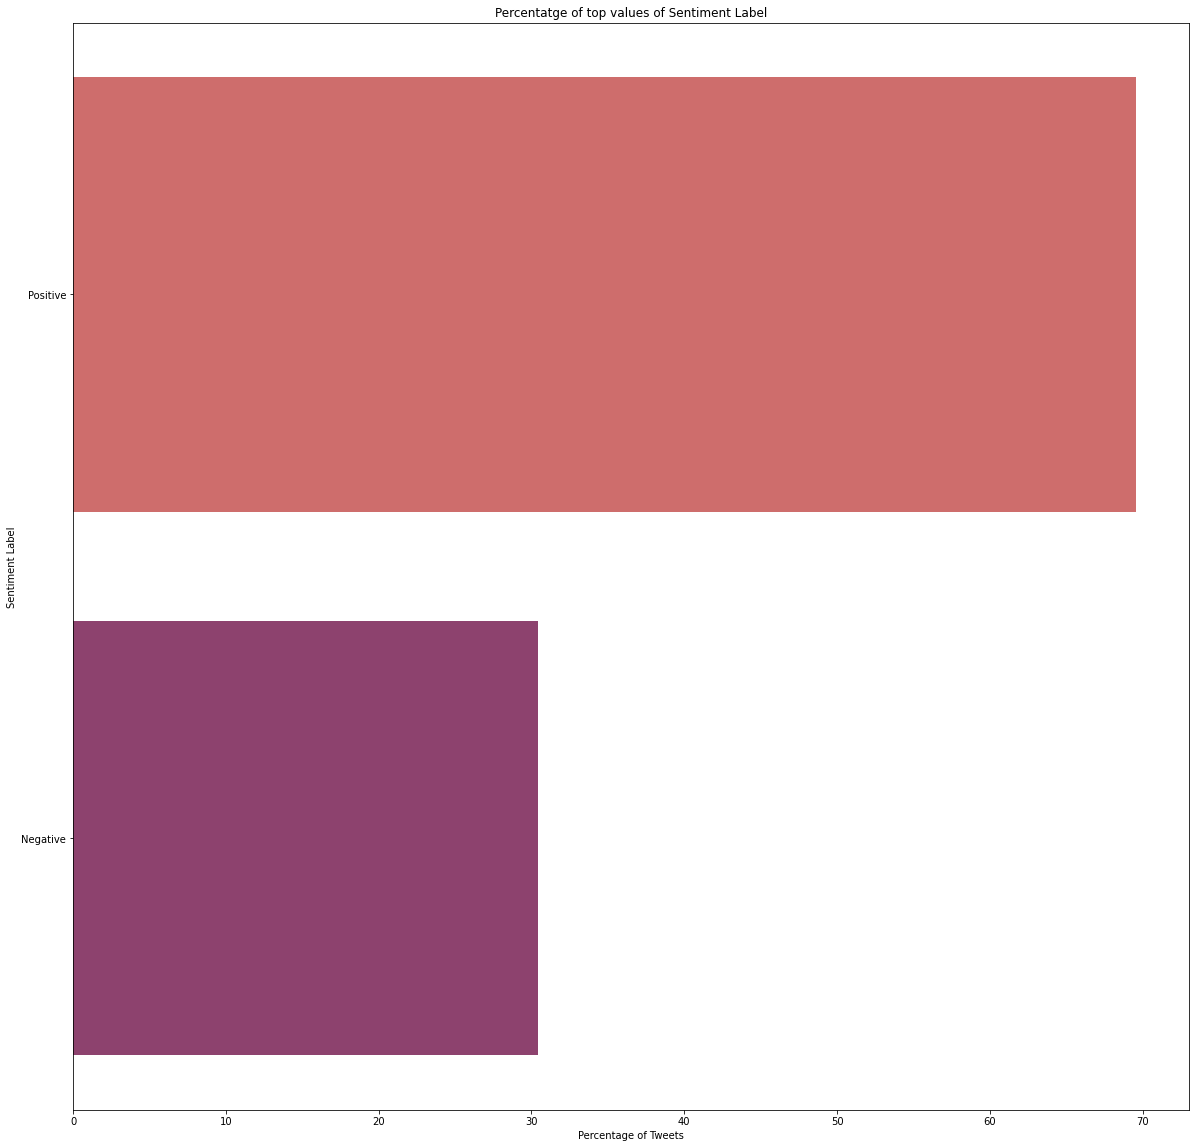

  Sentiment Label  Percentage of Tweets
0        Positive             69.555112
1        Negative             30.444888


In [96]:
repartition_in_percentage('Sentiment Label')

#### Density Distribution of Sentiment Label


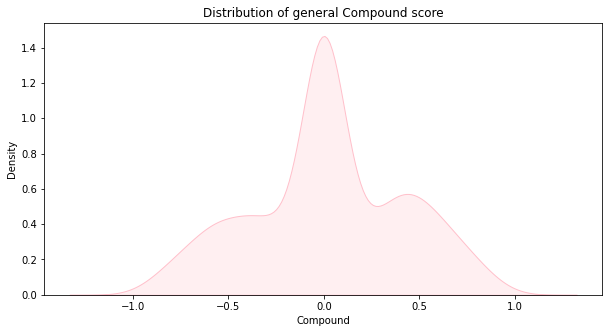

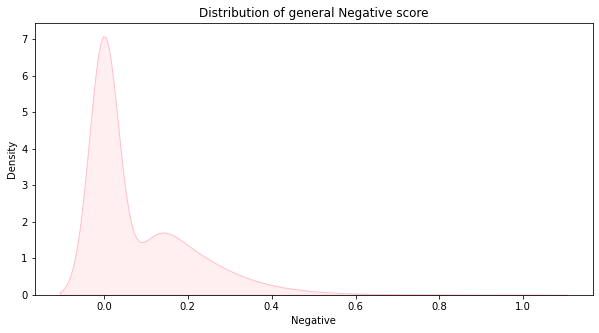

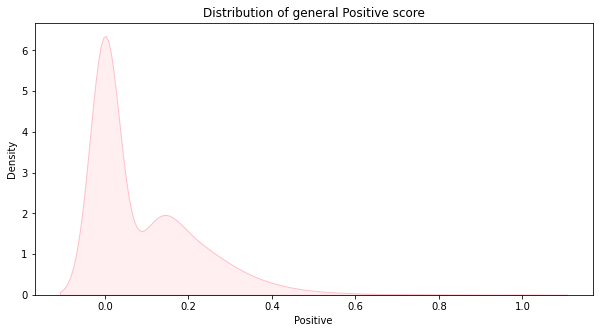

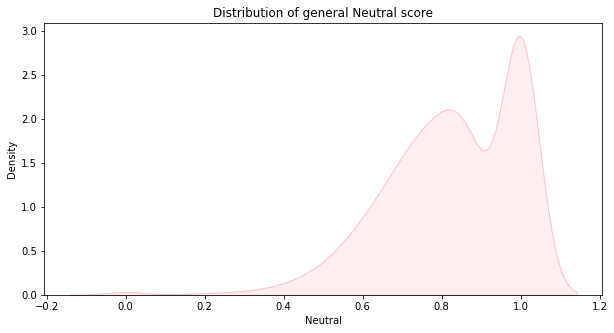

In [97]:
columns = ['Compound','Negative',	'Positive',	'Neutral']
for col in columns: 
  plt.figure(figsize=(10,5))
  sns.kdeplot(data = df, x =col, color="pink", bw_adjust=5, fill=True)
  plt.title('Distribution of general '+ col+' score')
  plt.show()

# Others

## Data dictionnary

- id
id	Int64	The integer representation of the unique identifier for this User. This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it. Using a signed 64 bit integer for storing this identifier is safe. Use id_str to fetch the identifier to be safe. See Twitter IDs for more information. Example:
		 
		"id": 6253282

- name		 
name	String	The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change. Example:
		 
		"name": "Twitter API"
- screen_name	 
screen_name	String	The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. Use id_str as a user identifier whenever possible. Typically a maximum of 15 characters long, but some historical accounts may exist with longer names. Example:
		 
		"screen_name": "twitterapi"
- location	 
location	String	Nullable . The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable. This field will occasionally be fuzzily interpreted by the Search service. Example:
		 
		"location": "San Francisco, CA"
- description		 
description	String	Nullable . The user-defined UTF-8 string describing their account. Example:
		 
		"description": "The Real Twitter API."
- verified		 
verified	Boolean	When true, indicates that the user has a verified account. See Verified Accounts . Example:
		 
		"verified": false
- followers_count		 
followers_count	Int	The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"followers_count": 21
- friends_count	 
friends_count	Int	The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”. Example:
		 
		"friends_count": 32
- favourites_count	 
favourites_count	Int	The number of Tweets this user has liked in the account’s lifetime. British spelling used in the field name for historical reasons. Example:
		 
		"favourites_count": 13
- created_at		 
created_at	String	The UTC datetime that the user account was created on Twitter. Example:
		 
		"created_at": "Mon Nov 29 21:18:15 +0000 2010"
		 


 From https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/user-object

The Id is the integer representation of the unique identifier for a twitter user